Trung bình độ dài câu hỏi: 61.94646924829157
Trung bình độ dài đoạn văn: 792.469867721696
Trung bình số lượng câu hỏi trong mỗi đoạn văn: 4.188300276173738


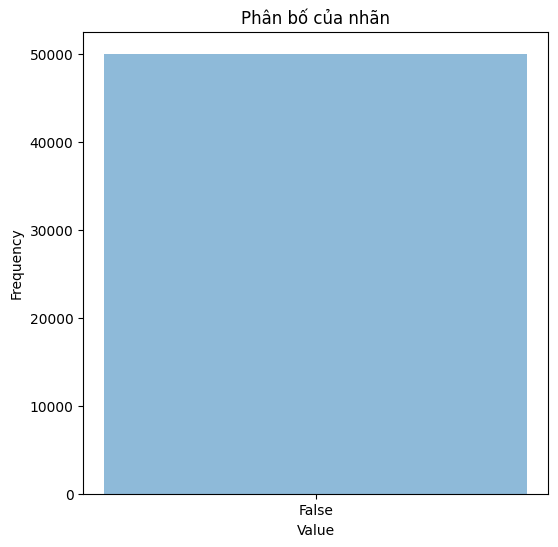

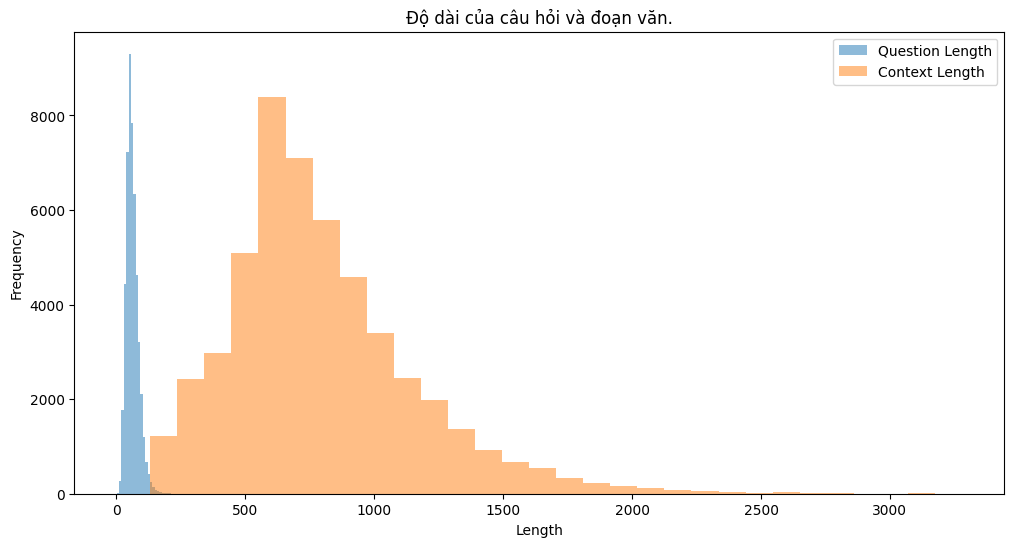

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

with open('train.json') as f:
    data = json.load(f)

# Chuyển đổi dữ liệu JSON thành DataFrame
df = pd.json_normalize(data, 'qas', ['context'],
                       record_prefix='qas_', errors='ignore')

#Tính độ dài của câu hỏi và câu trả lời
df['question_length'] = df['qas_question'].apply(len)
df['context_length'] = df['context'].apply(len)

# Tính số lượng câu hỏi cho mỗi đoạn văn
question_counts = df['context'].value_counts()

# Tính trung bình số lượng câu hỏi trong mỗi đoạn văn
avg_question_count = question_counts.mean()

print(f"Trung bình số lượng câu hỏi trong mỗi đoạn văn: {avg_question_count}")

# Tính trung bình độ dài câu hỏi và đoạn văn
avg_question_length = df['question_length'].mean()
avg_context_length = df['context_length'].mean()

print(f"Trung bình độ dài câu hỏi: {avg_question_length}")
print(f"Trung bình độ dài đoạn văn: {avg_context_length}")

# Tạo một cột mới cho nhãn dựa trên thông tin 'is_impossible'
df['label'] = df['qas_is_impossible'].apply(lambda x: 'impossible' if x else 'possible')

# Thống kê phân bố của biến 'is_impossible'
is_impossible_counts = df['qas_is_impossible'].value_counts()


# Vẽ biểu đồ thống kê phân bố của biến 'is_impossible'
plt.figure(figsize=(6, 6))
plt.bar(is_impossible_counts.index.map({True: 'True', False: 'False'}), is_impossible_counts.values, alpha=0.5)
plt.title('Phân bố của nhãn')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Hiển thị thống kê độ dài câu hỏi và đoạn văn
plt.figure(figsize=(12, 6))
plt.hist(df['question_length'], bins=30, alpha=0.5, label='Question Length')
plt.hist(df['context_length'], bins=30, alpha=0.5, label='Context Length')
plt.title('Độ dài của câu hỏi và đoạn văn.')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()